Inicio proyecto de 0 || Check de archvivos disponibles

In [1]:
##Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import OrdinalEncoder
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pywt

from datetime import datetime
import datetime as dt

In [2]:
#datos_diarios_completa

df_datos_diarios_completa = pd.read_csv('datos_diarios_completa.csv', sep=';')
print(df_datos_diarios_completa.head())
print(df_datos_diarios_completa.tail())
print(df_datos_diarios_completa.info())

    ID     FECHA  DIA      Consumo  Tmed  Feriado  Personas
0  1.0  1/7/2021  4.0  447,2708333  10,6      0.0    5034.0
1  2.0  2/7/2021  5.0  388,2395833  10,2      0.0    5649.0
2  3.0  3/7/2021  6.0    383,40625   9,6      0.0    7692.0
3  4.0  4/7/2021  7.0  388,7916667  13,3      0.0    6640.0
4  5.0  5/7/2021  1.0  400,1479167  12,8      0.0    4680.0
     ID FECHA  DIA Consumo Tmed  Feriado  Personas
903 NaN   NaN  NaN     NaN  NaN      NaN       NaN
904 NaN   NaN  NaN     NaN  NaN      NaN       NaN
905 NaN   NaN  NaN     NaN  NaN      NaN       NaN
906 NaN   NaN  NaN     NaN  NaN      NaN       NaN
907 NaN   NaN  NaN     NaN  NaN      NaN       NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        304 non-null    float64
 1   FECHA     304 non-null    object 
 2   DIA       304 non-null    float64
 3   Consumo   304 non-null    obje

OBSERVACIONES

Hay datos en 304 registros pero un dataset con un index de 908 entradas. Se observa con la función tail los datos vacíos.

In [3]:
df_datos_diarios_completa.dropna(inplace=True)
df_datos_diarios_completa["Consumo"] = df_datos_diarios_completa["Consumo"].apply(lambda x: x.replace(',', '.'))


In [4]:
df_datos_diarios_completa['FECHA'] = df_datos_diarios_completa['FECHA'].astype(str)
df_datos_diarios_completa['Consumo'] = df_datos_diarios_completa['Consumo'].astype(float)


In [5]:
df_datos_diarios_completa['FECHA'] = df_datos_diarios_completa['FECHA'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%d/%m/%Y'))

df_datos_diarios_completa['dia_semana'] = df_datos_diarios_completa['FECHA'].dt.dayofweek
df_datos_diarios_completa['FECHA'].head()

0   2021-07-01
1   2021-07-02
2   2021-07-03
3   2021-07-04
4   2021-07-05
Name: FECHA, dtype: datetime64[ns]

In [6]:
print(df_datos_diarios_completa.FECHA.min())
print(df_datos_diarios_completa.FECHA.max())

2021-07-01 00:00:00
2022-04-30 00:00:00


In [7]:
df_datos_diarios_completa['dia_mes_año'] = df_datos_diarios_completa['FECHA'].dt.strftime('%d-%m-%Y')
df_datos_diarios_completa['mes_año'] = df_datos_diarios_completa['FECHA'].dt.strftime('%Y-%m')
#df_datos_diarios_completa['mes_año'] = pd.to_datetime(df_datos_diarios_completa['mes_año'], errors='coerce')


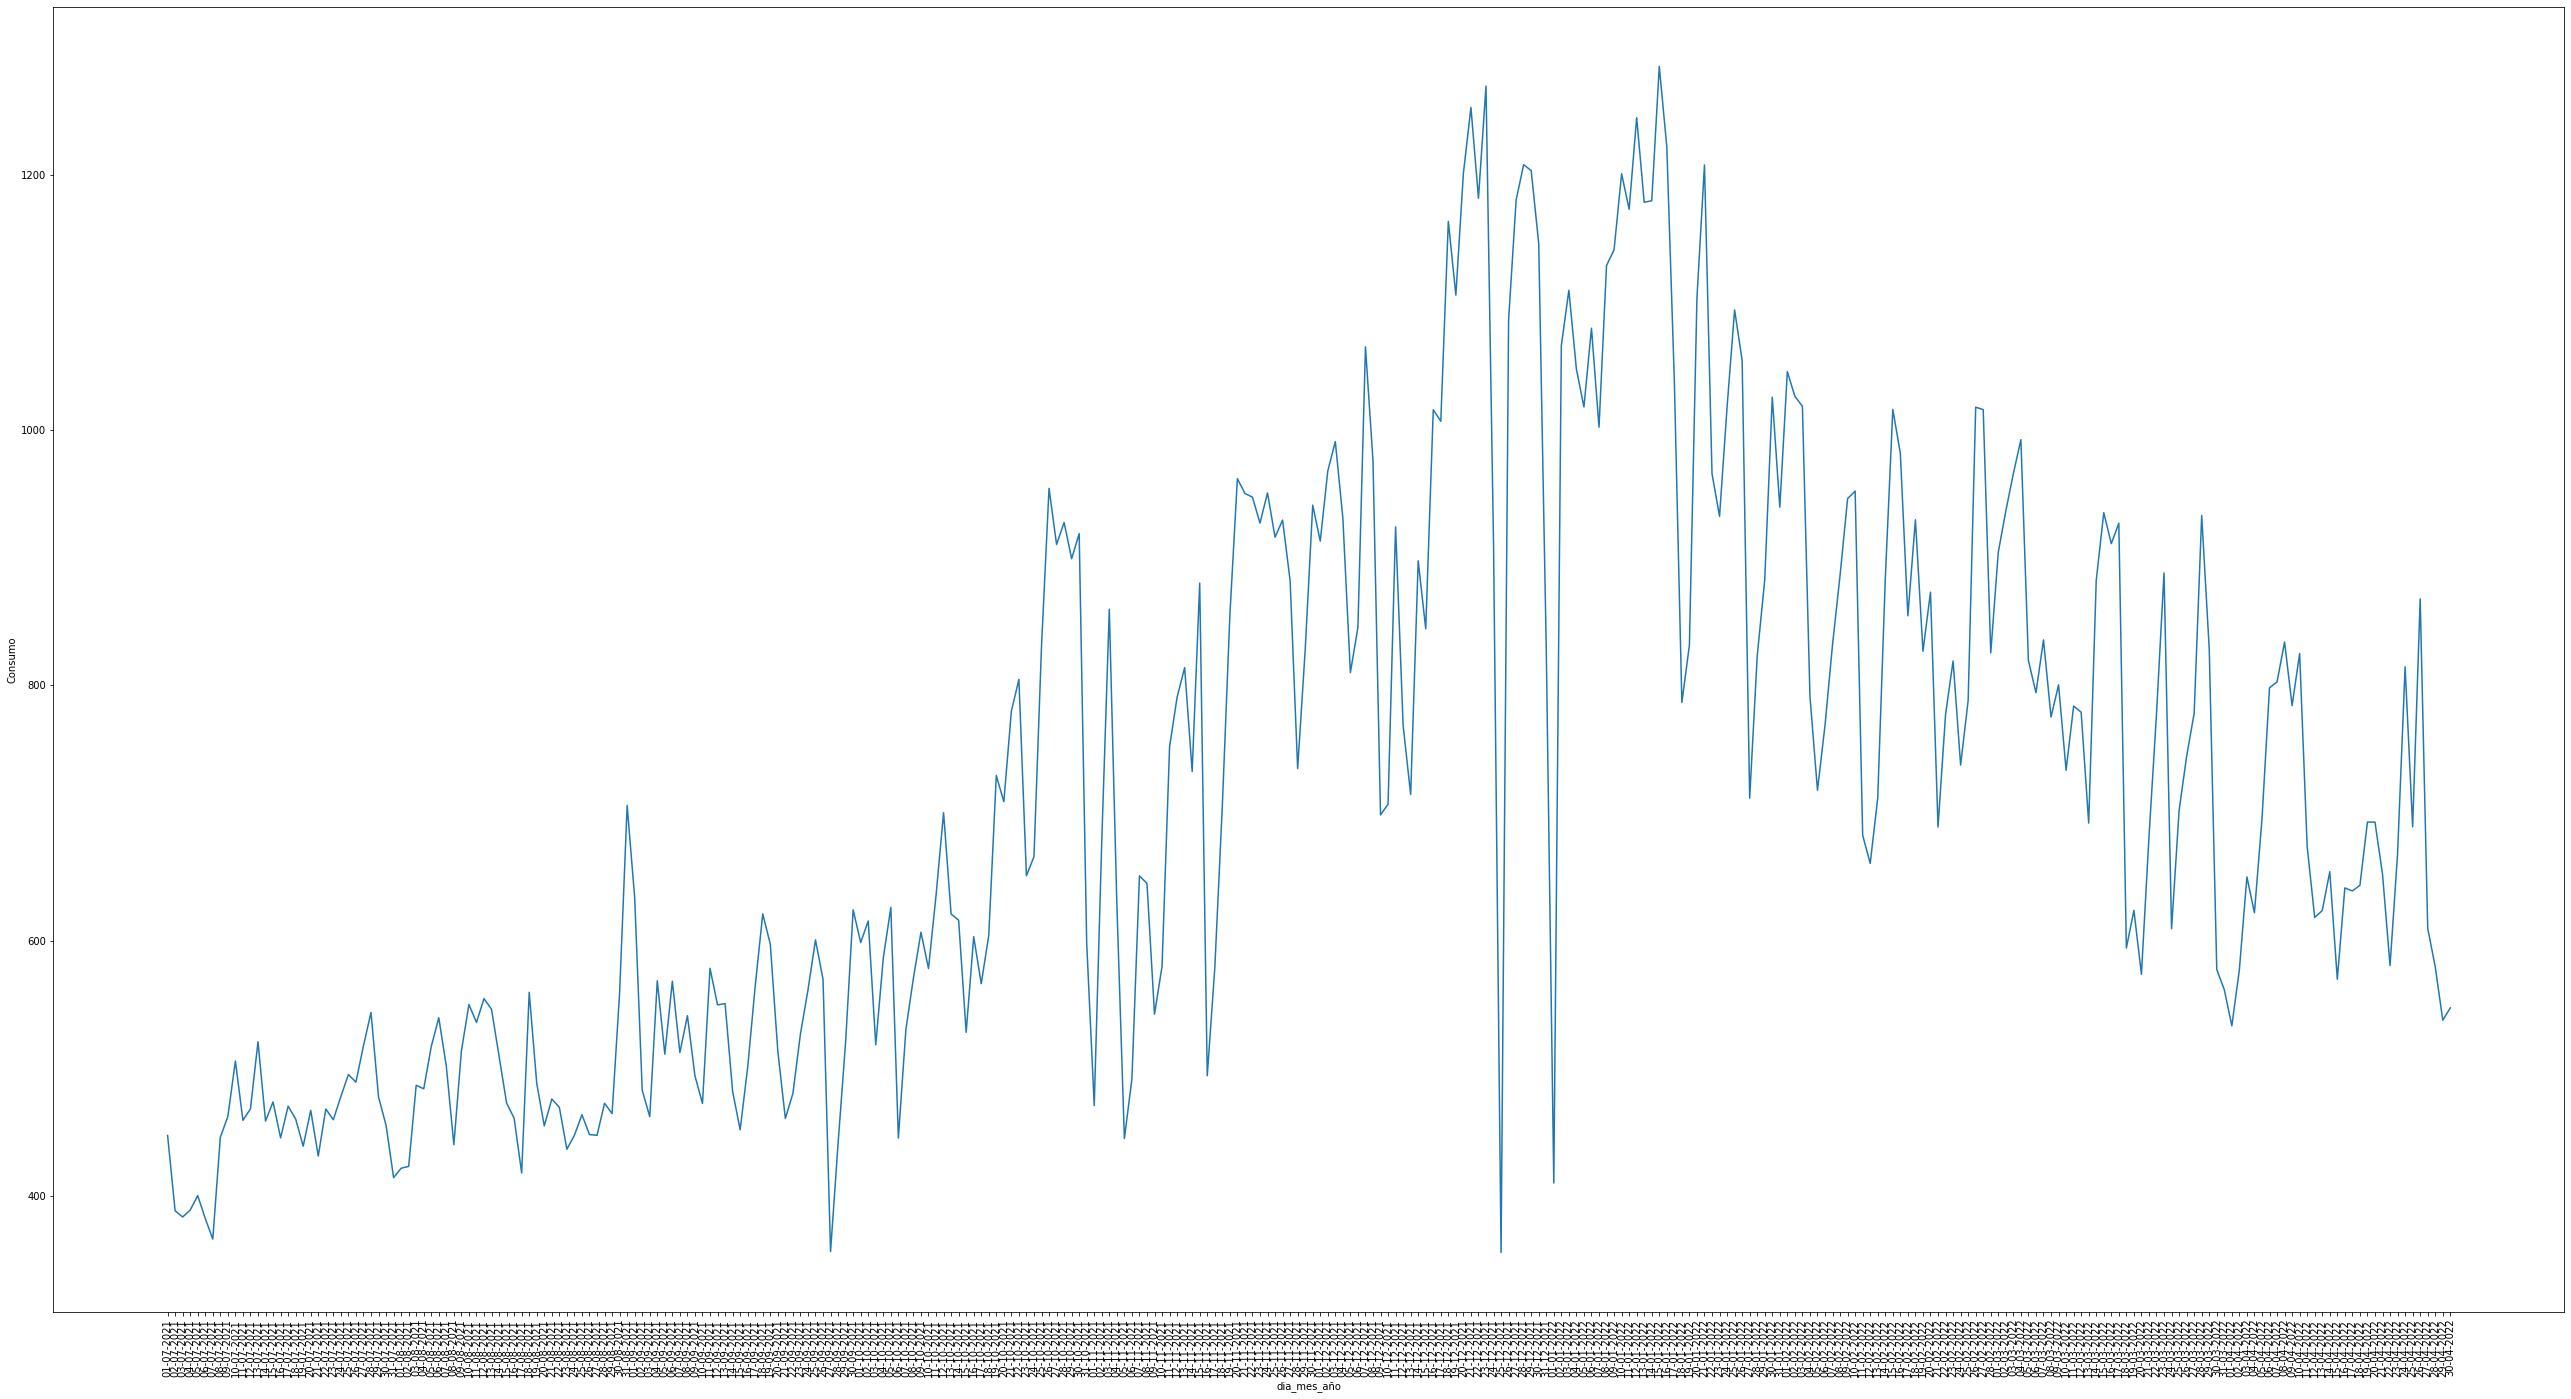

In [8]:
plt.figure(figsize=(45,24))
chart = sns.lineplot(
    data=df_datos_diarios_completa,
    x='dia_mes_año',
    y="Consumo",
    palette='Set1'
)
chart.tick_params(axis='x', labelrotation=90)


OBSERVACIONES
Hay picos a finales de diciembre y enero. Y se nota el cambio de consumo en 2021 con 2022.

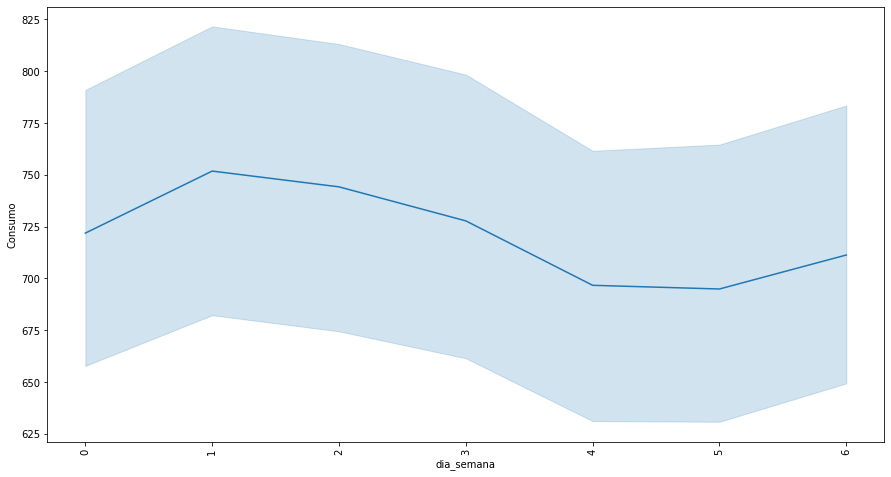

In [9]:
plt.figure(figsize=(15,8))
chart = sns.lineplot(
    data=df_datos_diarios_completa,
    x='dia_semana',
    y="Consumo",
    palette='Set1'
)
chart.tick_params(axis='x', labelrotation=90)

<AxesSubplot:>

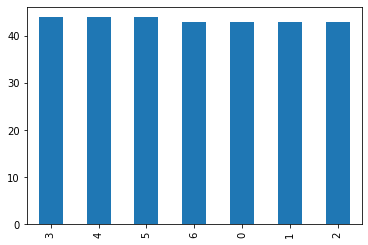

In [10]:
df_datos_diarios_completa.dia_semana.value_counts().plot(kind='bar')


OBSERVACIONES
Hay picos a finales de diciembre y enero. Y se nota el cambio de consumo en 2021 con 2022. En la distribución por día los días que más se consume no necesariamente son los días de los que más datos hay. ##hallazgo1

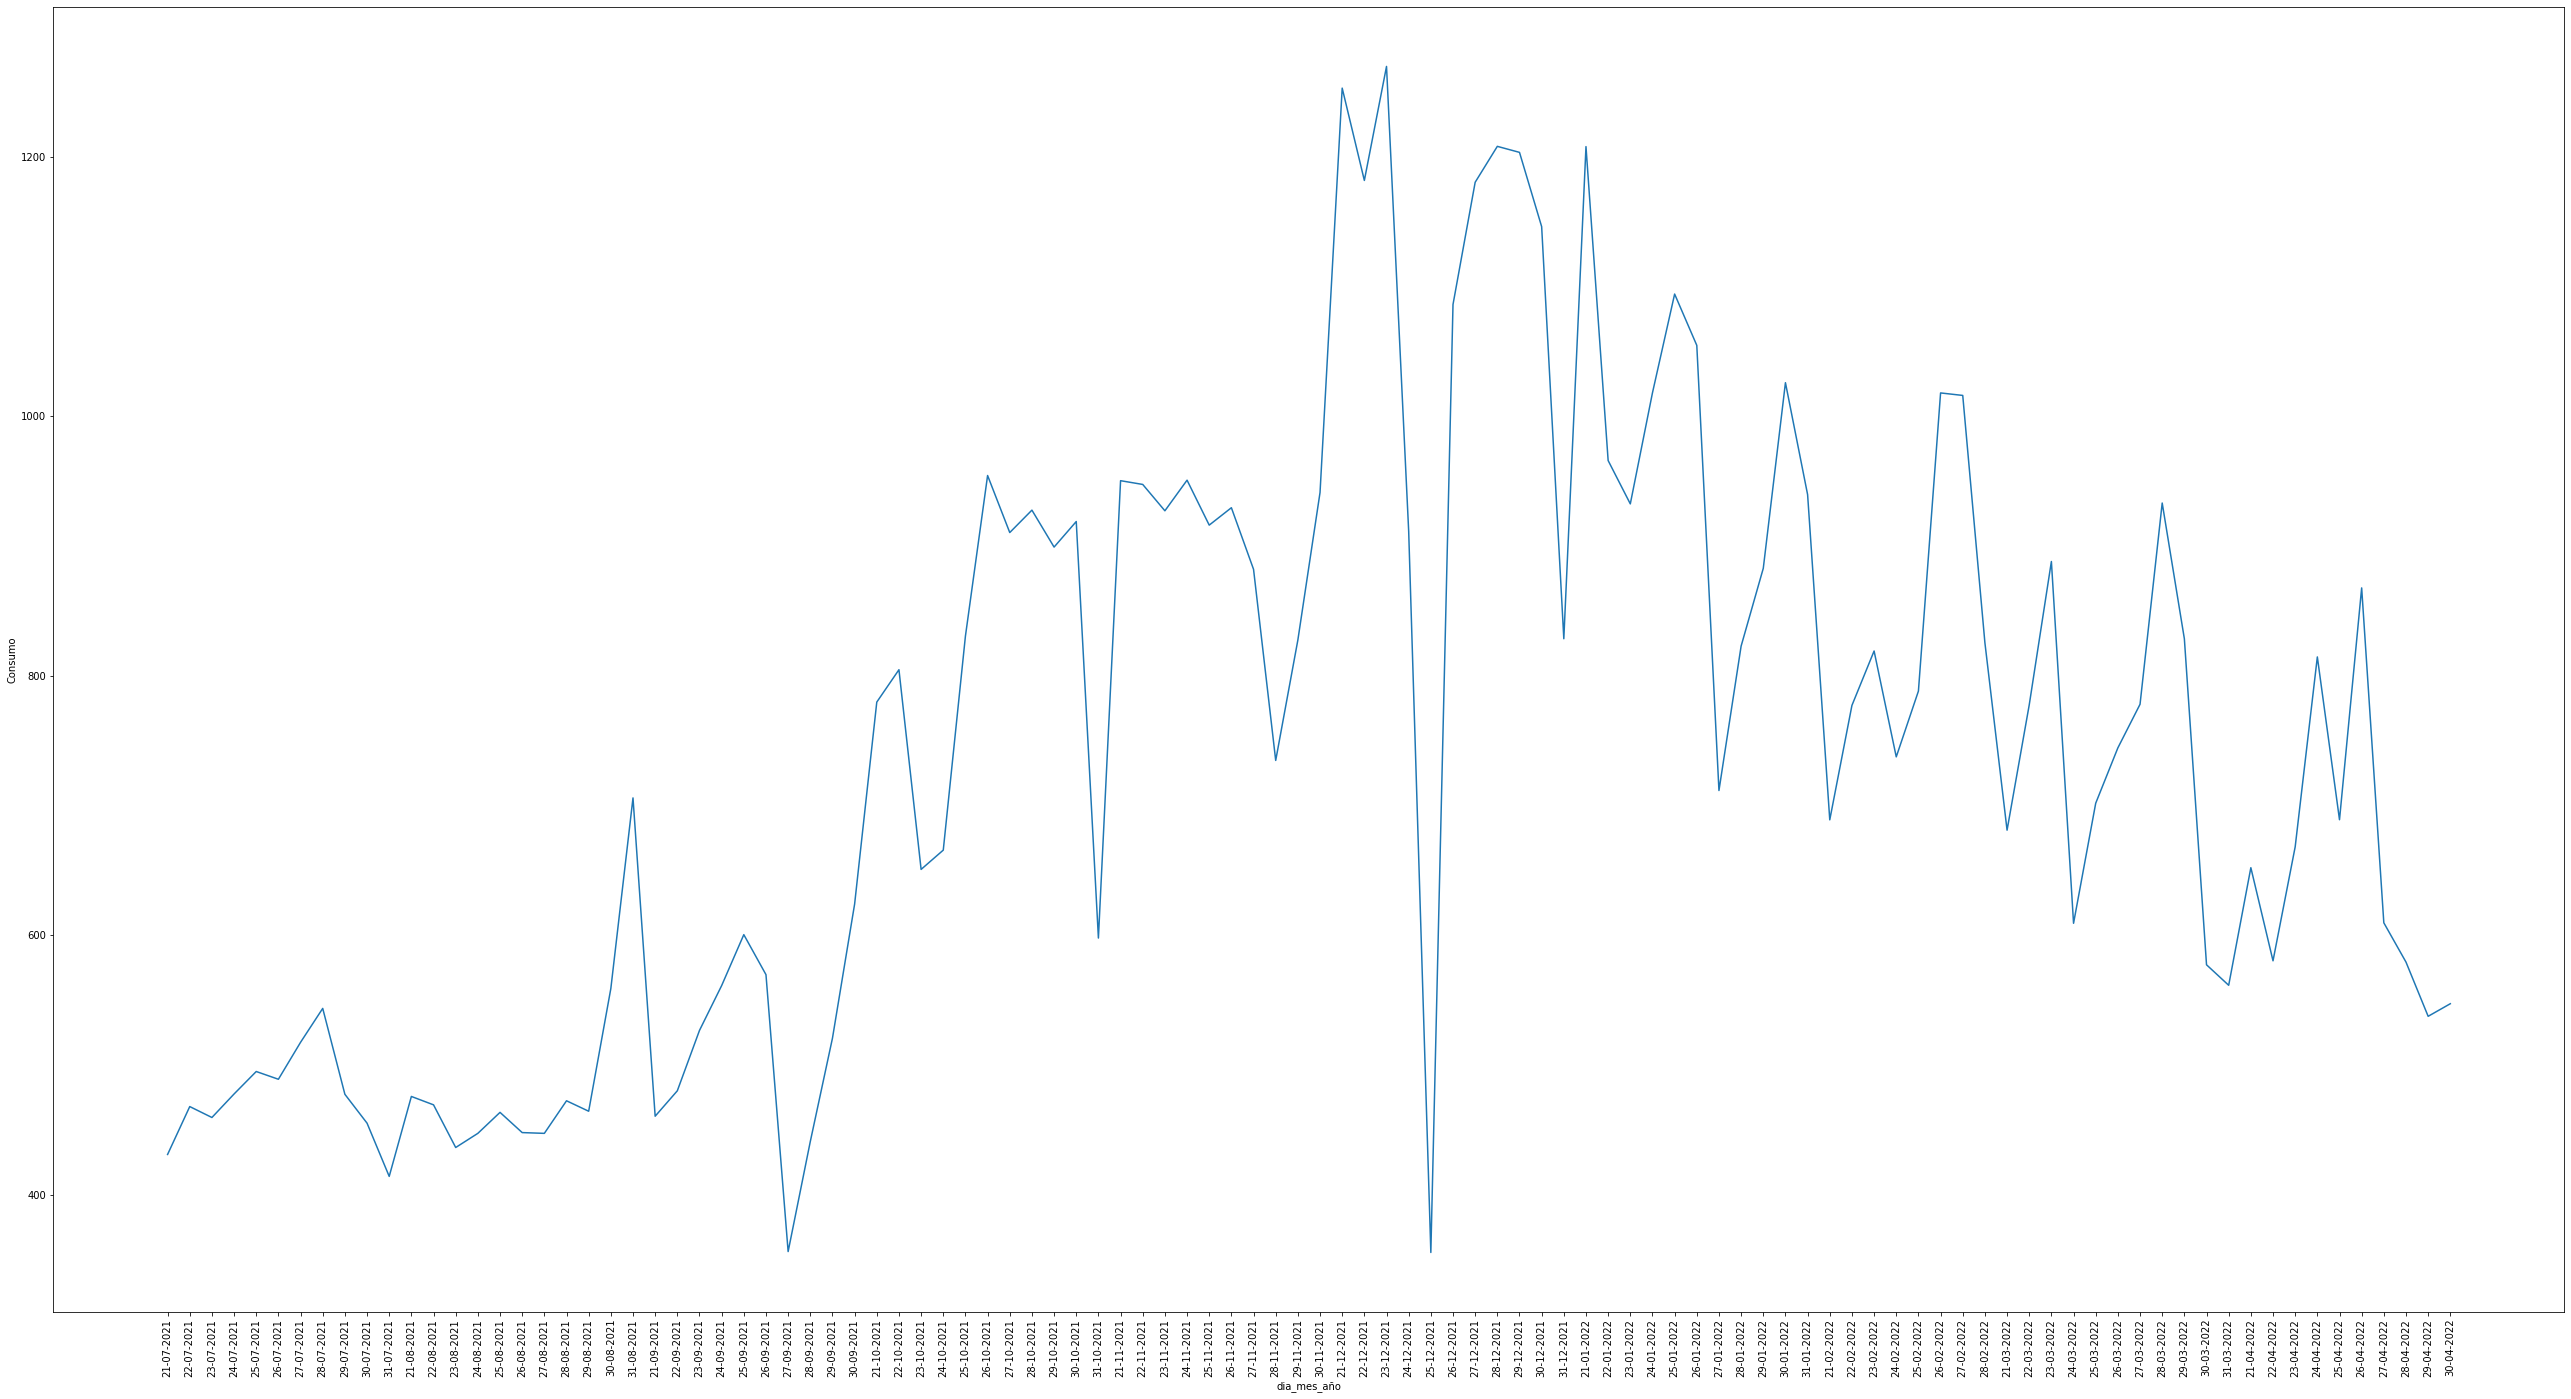

In [11]:
plt.figure(figsize=(45,24))
chart = sns.lineplot(
    data=df_datos_diarios_completa[df_datos_diarios_completa['dia_mes_año']> '2021-07-01 00:00:00'],
    x='dia_mes_año',
    y="Consumo",
    palette='Set1'
)
chart.tick_params(axis='x', labelrotation=90)

OBSERVACIONES
Hay mediciones muy bajas en fechas esperables. Navidad | Año nuevo 
Pero que pasó el 27/09/21, 31/10/21, 26/01/22, 211/02/22, 

##hallazgo2

In [12]:
print(df_datos_diarios_completa.FECHA.min())
print(df_datos_diarios_completa.FECHA.max())

2021-07-01 00:00:00
2022-04-30 00:00:00


In [13]:
df_reducido= df_datos_diarios_completa[df_datos_diarios_completa['mes_año'] >= '2021-01']

<AxesSubplot:xlabel='mes_año', ylabel='Consumo'>

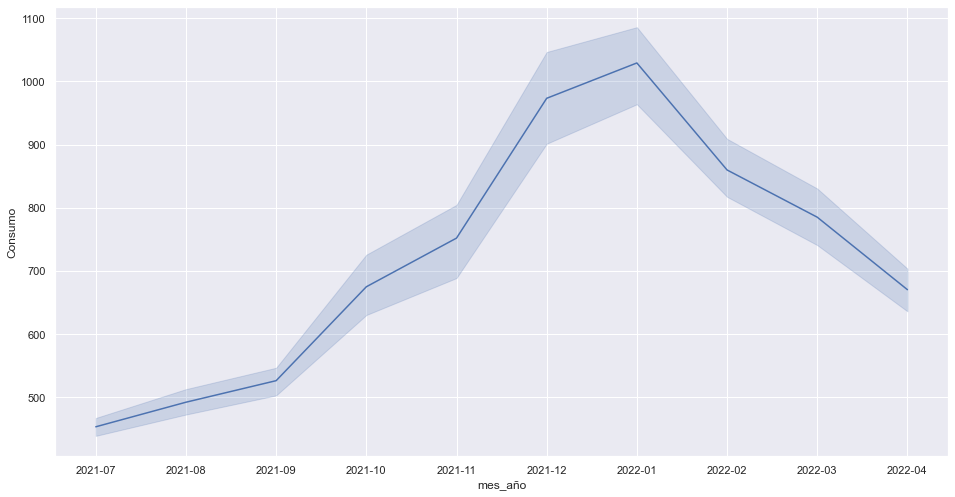

In [14]:
sns.set(rc={'figure.figsize':(16,8.27)})
sns.lineplot(x="mes_año", y="Consumo",
             data=df_reducido)

<AxesSubplot:>

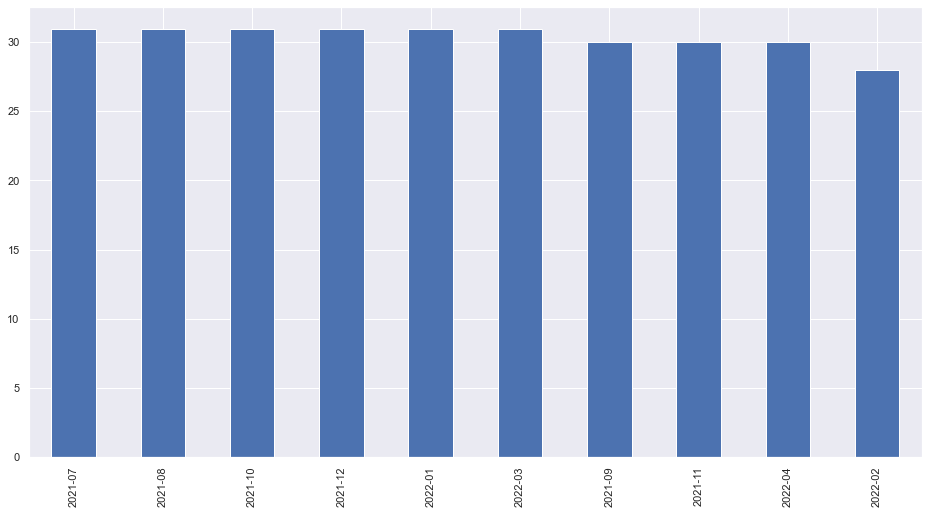

In [15]:
df_reducido.mes_año.value_counts().plot(kind='bar')


OBSERVACIONES
Hay mediciones muy bajas en fechas esperables. Navidad | Año nuevo 
Pero que pasó el 27/09/21, 31/10/21, 26/01/22, 211/02/22, 

##hallazgo2

In [16]:
df_datos_diarios_completa['Q'] = pd.PeriodIndex(df_datos_diarios_completa.FECHA, freq='Q')
df_datos_diarios_completa.Q.value_counts()

2021Q3    92
2021Q4    92
2022Q1    90
2022Q2    30
Freq: Q-DEC, Name: Q, dtype: int64

In [17]:
df_datos_diarios_completa.mes_año.value_counts()

2021-07    31
2021-08    31
2021-10    31
2021-12    31
2022-01    31
2022-03    31
2021-09    30
2021-11    30
2022-04    30
2022-02    28
Name: mes_año, dtype: int64

In [18]:
corte1= df_datos_diarios_completa[df_datos_diarios_completa['mes_año']=='2021-03-01']
corte1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           0 non-null      float64       
 1   FECHA        0 non-null      datetime64[ns]
 2   DIA          0 non-null      float64       
 3   Consumo      0 non-null      float64       
 4   Tmed         0 non-null      object        
 5   Feriado      0 non-null      float64       
 6   Personas     0 non-null      float64       
 7   dia_semana   0 non-null      int64         
 8   dia_mes_año  0 non-null      object        
 9   mes_año      0 non-null      object        
 10  Q            0 non-null      period[Q-DEC] 
dtypes: datetime64[ns](1), float64(5), int64(1), object(3), period[Q-DEC](1)
memory usage: 0.0+ bytes


In [19]:
df_datos_diarios_completa.mes_año.min(), df_datos_diarios_completa.mes_año.max()

('2021-07', '2022-04')

In [20]:
df_datos_diarios_completa.FECHA.min(), df_datos_diarios_completa.FECHA.max()

(Timestamp('2021-07-01 00:00:00'), Timestamp('2022-04-30 00:00:00'))

### Outliers

/Users/karinaalem/opt/anaconda3/envs/virtual/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Consumo'>

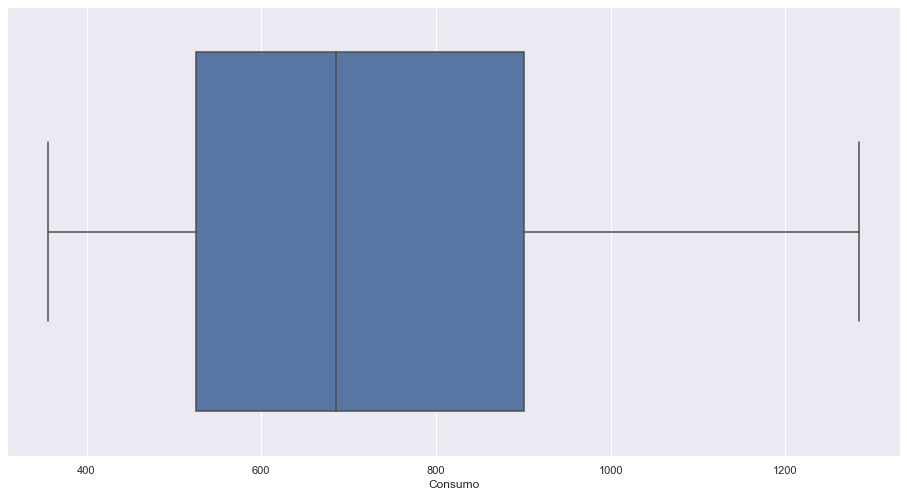

In [65]:
sns.boxplot(df_datos_diarios_completa['Consumo'])


# Forecasting 

## #1- Prophet

In [26]:
#pip install prophet

In [27]:
#pip install pystan

In [28]:
df_datos_diarios_completa['new_cases'] = df_datos_diarios_completa.Consumo - df_datos_diarios_completa.Consumo.shift().fillna(0)

df_datos_diarios_completa['rolling_weekly_avg'] = df_datos_diarios_completa.new_cases.rolling(window=7).mean().fillna(0)


In [43]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':df_datos_diarios_completa.index,'y':df_datos_diarios_completa.Consumo})
ts.head()
print(ts.shape)

(304, 2)


In [44]:
from prophet import Prophet

19:18:31 - cmdstanpy - INFO - Chain [1] start processing
19:18:31 - cmdstanpy - INFO - Chain [1] done processing


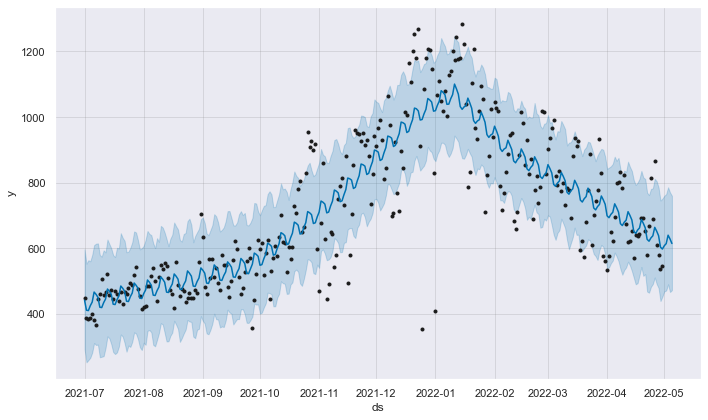

In [53]:

# instantiate the model and fit the timeseries
prophet = Prophet(changepoint_prior_scale=0.7)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=5)
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)

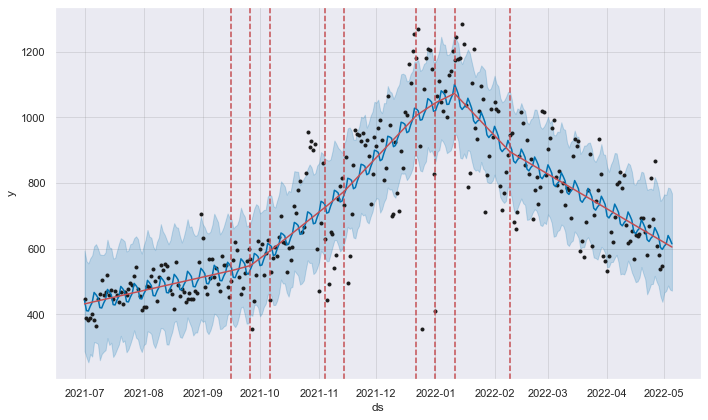

In [46]:
from prophet.plot import add_changepoints_to_plot
a = add_changepoints_to_plot(fig.gca(),prophet ,forecast)
fig

18:52:07 - cmdstanpy - INFO - Chain [1] start processing
18:52:07 - cmdstanpy - INFO - Chain [1] done processing


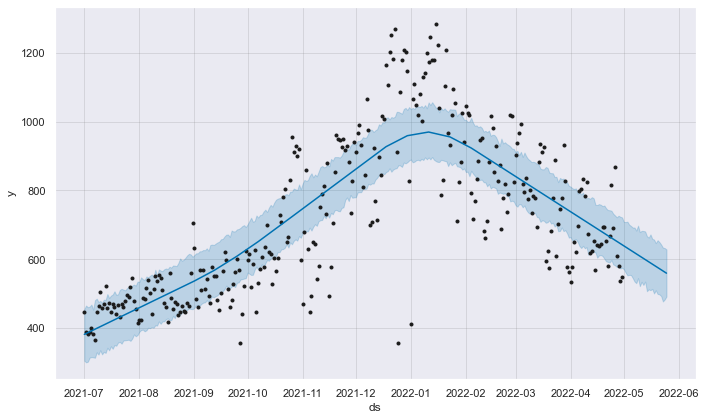

In [50]:
# instantiate the model and fit the timeseries
prophet = Prophet(weekly_seasonality=False, changepoint_range=1,changepoint_prior_scale=0.05, interval_width=0.45)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=25)
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)

#Diagnóstico

In [55]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(prophet, initial='50 days', period='10 days', horizon = '15 days')

  0%|          | 0/24 [00:00<?, ?it/s]

19:22:23 - cmdstanpy - INFO - Chain [1] start processing
19:22:23 - cmdstanpy - INFO - Chain [1] done processing
19:22:23 - cmdstanpy - INFO - Chain [1] start processing
19:22:24 - cmdstanpy - INFO - Chain [1] done processing
19:22:24 - cmdstanpy - INFO - Chain [1] start processing
19:22:24 - cmdstanpy - INFO - Chain [1] done processing
19:22:25 - cmdstanpy - INFO - Chain [1] start processing
19:22:25 - cmdstanpy - INFO - Chain [1] done processing
19:22:25 - cmdstanpy - INFO - Chain [1] start processing
19:22:26 - cmdstanpy - INFO - Chain [1] done processing
19:22:26 - cmdstanpy - INFO - Chain [1] start processing
19:22:26 - cmdstanpy - INFO - Chain [1] done processing
19:22:26 - cmdstanpy - INFO - Chain [1] start processing
19:22:26 - cmdstanpy - INFO - Chain [1] done processing
19:22:26 - cmdstanpy - INFO - Chain [1] start processing
19:22:26 - cmdstanpy - INFO - Chain [1] done processing
19:22:26 - cmdstanpy - INFO - Chain [1] start processing
19:22:27 - cmdstanpy - INFO - Chain [1]

In [56]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,19545.362887,139.804731,107.959596,0.138204,0.122714,0.136183,0.583333
1,3 days,29334.374159,171.272806,135.039945,0.174921,0.174332,0.170701,0.458333
2,4 days,30195.714078,173.769140,145.346641,0.192299,0.159956,0.186226,0.416667
3,5 days,24793.464165,157.459405,127.349209,0.168726,0.110132,0.163451,0.527778
4,6 days,28596.607486,169.105315,112.733334,0.165572,0.088120,0.143304,0.611111


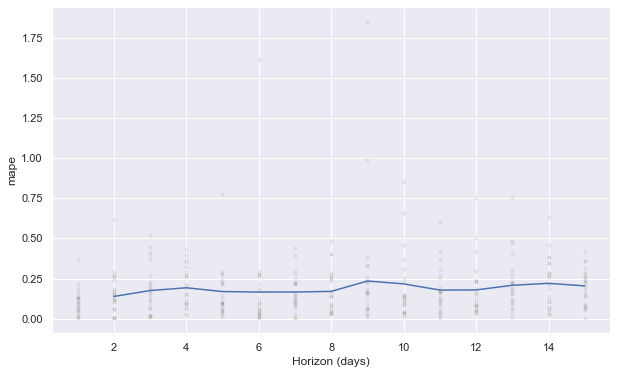

In [57]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [58]:
# ajustes de hiperparámetros